# **DRIVE ACCESS AUTHENTICATION**



In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWj2tf49SIWCrtPX-cHkMAtdR_bxvc4YaZbjeeIQ-EtfDcqbt0SoZfE


# **IMPORTING PACKAGES**

In [ ]:
import pandas as pd       # dataframe operations 
import numpy as np        # numeric operations 
from sklearn import preprocessing 

# **READING THE DATASET**

In [ ]:
path = '/content/drive/MyDrive/Data/dementia_data.csv'  # path of the dataset 

df = pd.read_csv(path)  # reads data and stores as dataframe 

# **DATA PREPROCESSING**

**SOME PANDAS COMMANDS**

In [7]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,1327,0.796,1.323


In [6]:
# shows n entries from the beginning of the dataset 
#  default = 5 
df.head(4)  

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,1738,0.713,1.010


In [7]:
# shows n entries from the end of the dataset 
#  default = 5 
df.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,65,13,2.0,30.0,1333,0.801,1.317


In [8]:
# returns the size of the dataframe
df.shape

(373, 13)

In [9]:
# outputs the name of the columns 
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age',
       'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [10]:
# returns the data type and the number of entries of all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Age         373 non-null    int64  
 7   EDUC        373 non-null    int64  
 8   SES         354 non-null    float64
 9   MMSE        371 non-null    float64
 10  eTIV        373 non-null    int64  
 11  nWBV        373 non-null    float64
 12  ASF         373 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 38.0+ KB


In [ ]:
# returns the unique values of a column 
df['M/F'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

In [ ]:
# shows the count of unique value in a column
df['M/F'].value_counts(dropna = False)

F    213
M    160
Name: M/F, dtype: int64

In [ ]:
df['SES'].value_counts(dropna = True)



2.0    103
1.0     88
3.0     82
4.0     74
5.0      7
Name: SES, dtype: int64

In [ ]:
# renames the columns
# inplace makes changes to the original dataset 
# in case inplace = False , a temporary dataframe instance is created
df.rename(columns = {'M/F' : 'Gender'} , inplace = True)

In [ ]:
# renamed column 
df

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,1327,0.796,1.323


In [ ]:
# the columns which provide no info of relevance are dropped from the dataframe 
# axis - 0 : rows , 
df.drop(labels = {'Subject ID' , 'MRI ID' ,'Visit' , 'MR Delay' } , axis = 1 , inplace = True)

In [ ]:
df

,Group,Gender,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,1327,0.796,1.323


In [ ]:
df.describe()

,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2004.000000,0.837000,1.587000


**REMOVING / REPLACING NULL VALUES**

In [ ]:
# is null returns true for null values and false for null values 
# the sum() gives the total count of null values for each row 

df.isnull().sum()

Group      0
Gender     0
Age        0
EDUC       0
SES       19
MMSE       2
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [ ]:
# count() returns the count of non null values of the column 
df['SES'].count()

354

In [ ]:
# drops all the rows containing null values from the dataframe 
null_rem = df.dropna()


In [ ]:
# comparision 
print( "Original Dataframe : \n",df.head() ,"\n\n" , "New Dataframe : \n" ,null_rem.head())

Original Dataframe : 
          Group Gender  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
0  Nondemented      M   87    14  2.0  27.0  1987  0.696  0.883
1  Nondemented      M   88    14  2.0  30.0  2004  0.681  0.876
2     Demented      M   75    12  NaN  23.0  1678  0.736  1.046
3     Demented      M   76    12  NaN  28.0  1738  0.713  1.010
4     Demented      M   80    12  NaN  22.0  1698  0.701  1.034 

 New Dataframe : 
          Group Gender  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF
0  Nondemented      M   87    14  2.0  27.0  1987  0.696  0.883
1  Nondemented      M   88    14  2.0  30.0  2004  0.681  0.876
5  Nondemented      F   88    18  3.0  28.0  1215  0.710  1.444
6  Nondemented      F   90    18  3.0  27.0  1200  0.718  1.462
7  Nondemented      M   80    12  4.0  28.0  1689  0.712  1.039


In [15]:
# dropping all null values from a column 
null_rem_col = df.dropna(subset = ['MMSE'])

In [16]:
null_rem_col['MMSE'].isnull().sum()

0

In [ ]:
null_rem_col.shape

(371, 9)

In [13]:
# replacing null values
# replace them by either mean or median 
# we will replace them with median

# columns which have null values
col_null = ['MMSE' , 'SES'] 
med = []

# loop for obtaining the median 
for i in col_null: 
  med.append(df[i].median())  

print("Median Values : " , med[0] , med[1])

k = 0 

# loop for replacing null values 
for i in col_null:
  df[i].fillna(med[k] , inplace = True)    # fillna fills the null values 
  k = k + 1 





 


Median Values :  29.0 2.0


In [17]:
# checking for null values again 

df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
dv = df.copy()


In [9]:
dv

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,1327,0.796,1.323


# Task

The tasks are as follows : 
1. Copy df into another dataframe using copy(). Make 2 such copies : df_copy , vis_copy
2. Implement Sklearn label encoding on df
3. Implement dummy encoding on the df_copy
4. Plot a simple barplot depicting the count / number of males and females using vis_copy

In [5]:
df_copy = df.copy()
vis_copy = df.copy()

In [17]:
label_encoder =LabelEncoder()
df['Group']= label_encoder.fit_transform(df['Group'])
df['M/F']= label_encoder.fit_transform(df['M/F'])
df.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,87,14,2.0,27.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,1,88,14,2.0,30.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,75,12,NaN,23.0,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,1,76,12,NaN,28.0,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,1,80,12,NaN,22.0,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,1,1,0,0,88,18,3.0,28.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,1,2,538,0,90,18,3.0,27.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,1,1,0,1,80,12,4.0,28.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,1,2,1010,1,83,12,4.0,29.0,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,1,3,1603,1,85,12,4.0,30.0,1699,0.705,1.033


In [21]:
pd.get_dummies(df_copy, columns= ['M/F', 'Group'])

,Subject ID,MRI ID,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,M/F_F,M/F_M,Group_Demented,Group_Nondemented
0,OAS2_0001,OAS2_0001_MR1,1,0,87,14,2.0,27.0,1987,0.696,0.883,0,1,0,1
1,OAS2_0001,OAS2_0001_MR2,2,457,88,14,2.0,30.0,2004,0.681,0.876,0,1,0,1
2,OAS2_0002,OAS2_0002_MR1,1,0,75,12,NaN,23.0,1678,0.736,1.046,0,1,1,0
3,OAS2_0002,OAS2_0002_MR2,2,560,76,12,NaN,28.0,1738,0.713,1.010,0,1,1,0
4,OAS2_0002,OAS2_0002_MR3,3,1895,80,12,NaN,22.0,1698,0.701,1.034,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,2,842,82,16,1.0,28.0,1693,0.694,1.037,0,1,1,0
369,OAS2_0185,OAS2_0185_MR3,3,2297,86,16,1.0,26.0,1688,0.675,1.040,0,1,1,0
370,OAS2_0186,OAS2_0186_MR1,1,0,61,13,2.0,30.0,1319,0.801,1.331,1,0,0,1
371,OAS2_0186,OAS2_0186_MR2,2,763,63,13,2.0,30.0,1327,0.796,1.323,1,0,0,1


In [8]:
X = ['Female', 'Male']

In [7]:
Y = vis_copy['M/F'].value_counts()
Y

F    213
M    160
Name: M/F, dtype: int64

In [12]:
import matplotlib.pyplot as plt 

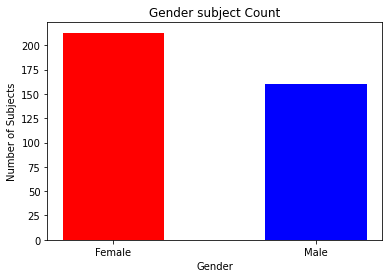

In [13]:
plt.bar(X , Y , color = ['r', 'b'], width = 0.5)
plt.xlabel("Gender")
plt.ylabel("Number of Subjects")
plt.title("Gender subject Count")
plt.show()